In [97]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

# Basic Plots

## Scatter Plot

In [4]:
import seaborn as sns
sns.set(style="ticks")
x = sns.load_dataset("anscombe")

In [5]:
x.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [160]:
?sns.lmplot

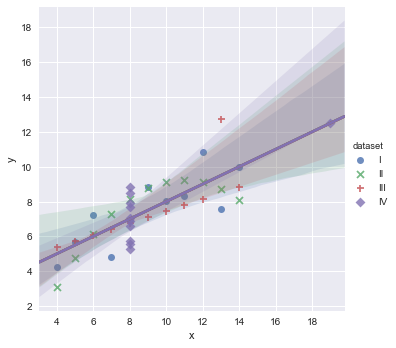

In [161]:
sns.lmplot(x="x", 
           y="y", 
           data=x, 
           hue="dataset",
           markers=["o","x","+","D"]) #https://matplotlib.org/examples/lines_bars_and_markers/marker_reference.html

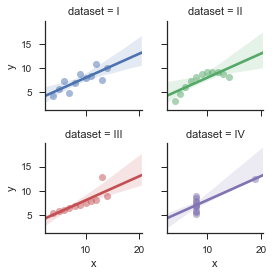

In [28]:
sns.lmplot(x="x", 
           y="y", 
           data=x, 
           hue="dataset",
           col="dataset",
           col_wrap=2, #must have col = factor variable,
           ci=95, #or None
           size=2, #graph size
           scatter_kws={"s": 50, "alpha": 0.5} #additional parameter to https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.scatter.html
           )

In [9]:
?sns.lmplot #many parameters to choose from

In [29]:
?sns.jointplot

## Boxplot

In [30]:
?sns.boxplot

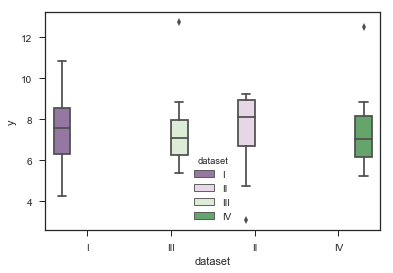

In [35]:
sns.boxplot(x="dataset", 
            y="y", 
            data=x, 
            hue="dataset", 
            order=["I","III","II","IV"], 
            orient="v",
            palette="PRGn")

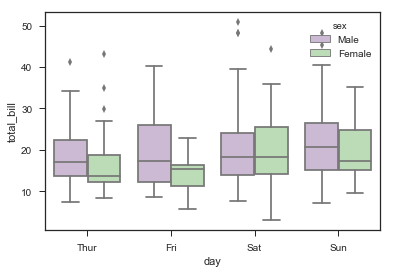

In [40]:
t = sns.load_dataset("tips")
#with 2 categorical variables, we can do a two way segmentation
sns.boxplot(x="day", y="total_bill", hue="sex", data=t, palette="PRGn")

In [41]:
t.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


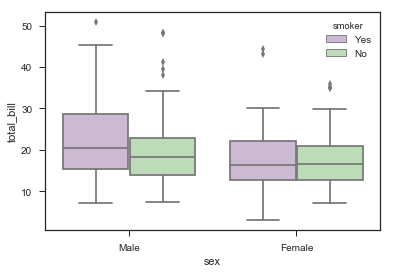

In [51]:
sns.boxplot(x="sex", y="total_bill", hue="smoker", data=t, palette="PRGn") #good method to visualize 2 factors
#2 categorical and 1 continous variables 

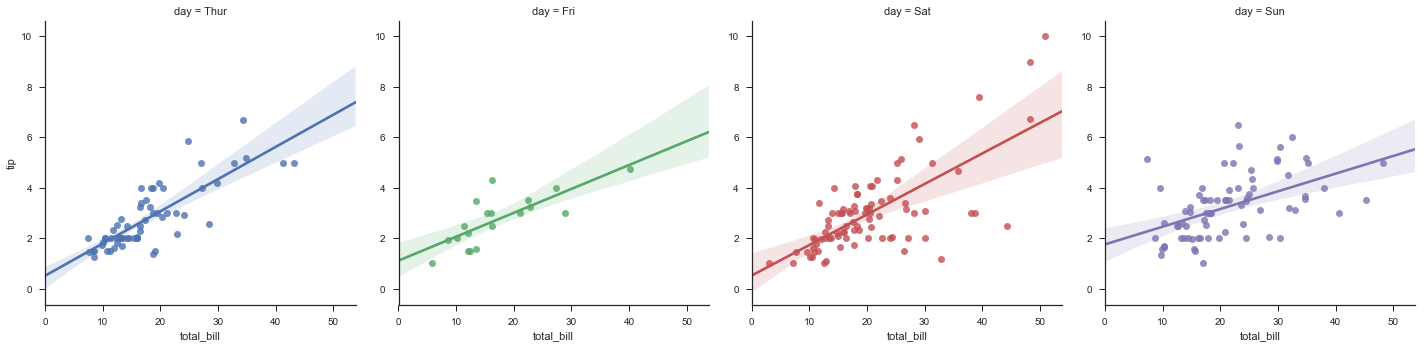

In [52]:
sns.lmplot(x="total_bill", y="tip", data=t, hue="day", col="day") #1 categorical and 2 continous variables

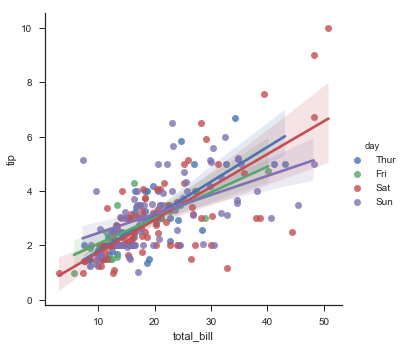

In [58]:
sns.lmplot(x="total_bill", y="tip", data=t, hue="day", truncate=True) #truncate at data range

In [53]:
?sns.swarmplot

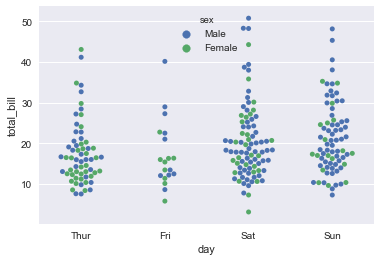

In [155]:
sns.swarmplot(x="day", y="total_bill", hue="sex", data=t) #similr to box plot but more detailed

## Barplot

In [59]:
titanic = sns.load_dataset("titanic")

In [60]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


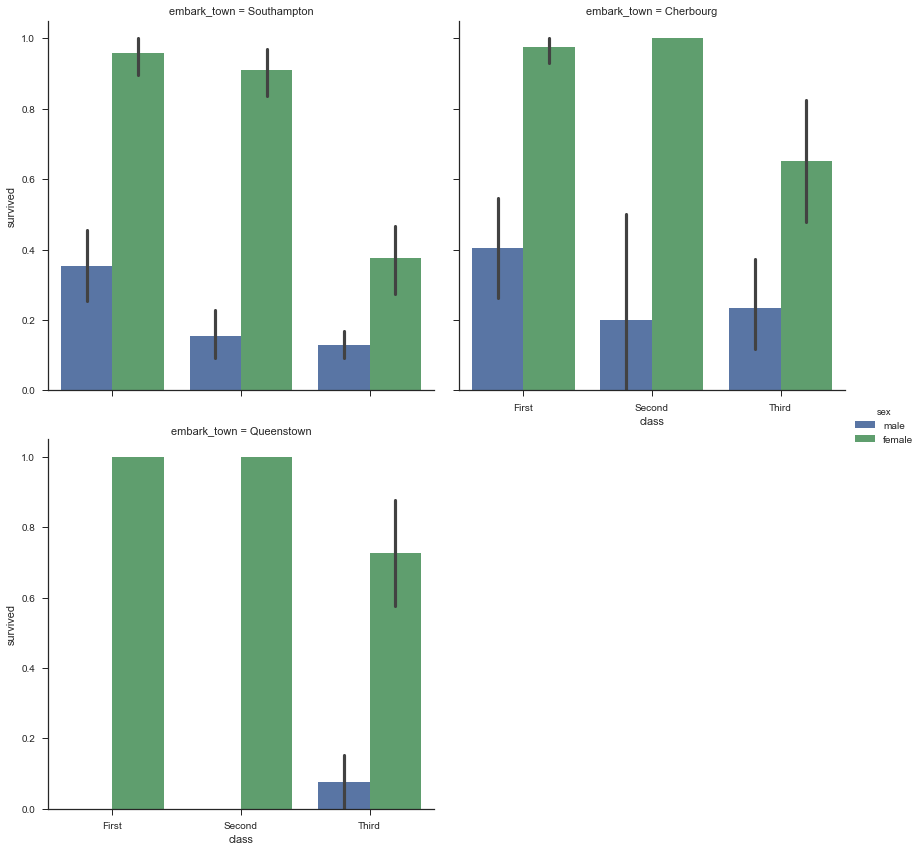

In [69]:
g = sns.factorplot(x="class", 
                   y="survived", 
                   hue="sex", 
                   data=titanic,
                   size=6,
                   kind="bar",
                   col="embark_town",
                   col_wrap=2
                  )

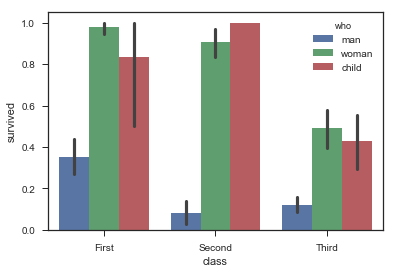

In [74]:
sns.barplot(x="class", y="survived", data=titanic, hue="who")
#obviously women and children are more likely to survive

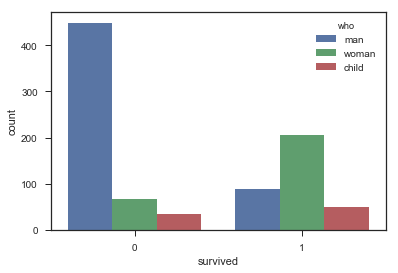

In [82]:
sns.countplot(x="survived", hue="who", data=titanic) #basically just show counts of binary variables

In [88]:
#try to plot an identity bar
d = pd.DataFrame()
d['feature'] = ['a','b','c']
d['value'] = [1,2,3]
d

,feature,value
0,a,1
1,b,2
2,c,3


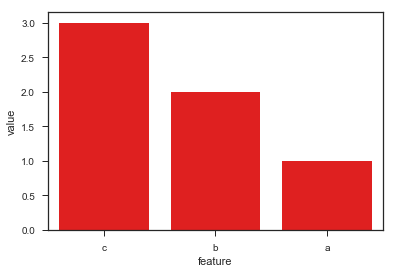

In [95]:
#very nice. hue is used for mapping, color is used for designation
sns.barplot(x="feature",
            y="value",
            data=d.sort_values(by="value", ascending=False),
            color="#FF0000"
           )

## Density Plot

In [83]:
?sns.barplot

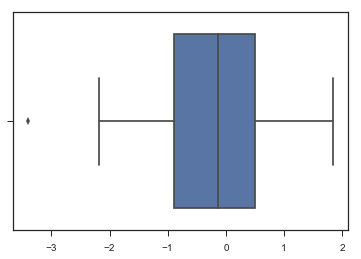

In [104]:
normal_dist = np.random.normal(size=100)
sns.boxplot(normal_dist) #normal dist

In [123]:
?sns.distplot

In [120]:
?plt.subplot

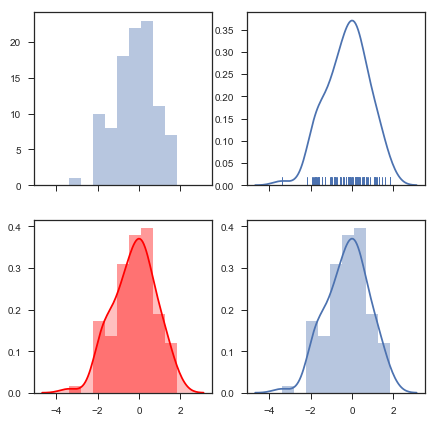

In [121]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True) #create subplots; force all X limits are the same
#subplots -
#the distplot generates the histogram

sns.distplot(normal_dist, ax=axes[0,0], kde=False)
sns.distplot(normal_dist, ax=axes[0,1], hist=False, rug=True) #rug - indicator of distributions
sns.distplot(normal_dist, ax=axes[1,0], color="r", kde_kws={"shade": True}) #adding a shade to dist
sns.distplot(normal_dist, ax=axes[1,1])

Text(0.5,1,u'1000 samples')

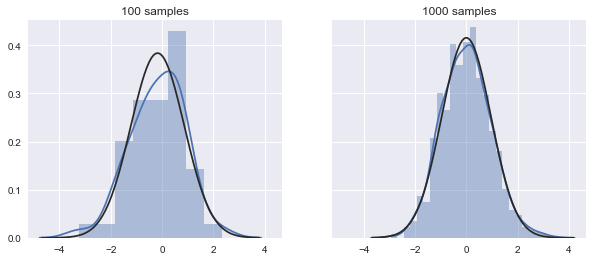

In [154]:
from scipy.stats import norm #fit a normal dist
f, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey='all')
sns.distplot(np.random.normal(size=50), fit=norm, ax=axes[0]).set_title("100 samples")
sns.distplot(np.random.normal(size=1000), fit=norm, ax=axes[1]).set_title("1000 samples")


In [125]:
?sns.rugplot #no need to get too deep into the details

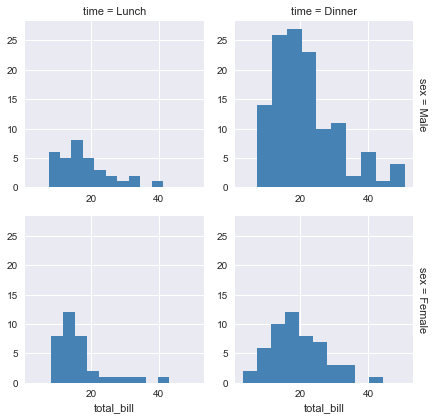

In [134]:
#it's a bit confusing this way, mapping hist gram to 
sns.set(style="darkgrid")
g = sns.FacetGrid(t, row="sex", col="time", margin_titles=True) #so this is generating a grid
bins = np.linspace(0, 60, 13) #generate bins
g.map(plt.hist, "total_bill", color="steelblue", bins=10, lw=0)

In [135]:
#np.linspace(0, 60, 11)
?sns.distplot